In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [11]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [12]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [13]:
model = LinearRegression()

In [14]:
model.fit(x,y)

LinearRegression()

In [15]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [16]:
model = LinearRegression().fit(x, y)

In [17]:
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.715875613747954


In [18]:
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Intercept: 5.633333333333329
Slope: [0.54]


In [20]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [5.63333333]
slope: [[0.54]]


In [22]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


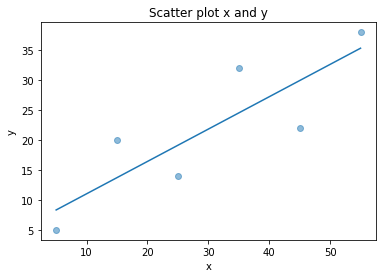

In [25]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


## Multiple Linear Regression

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0,1], [5,1], [15,2], [25,5], [35,11],[45,15],[55,34],[60,35]]
y = [4,5,20,14,32,22,38,43]
x, y = np.array(x), np.array(y)

In [30]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [31]:
model = LinearRegression().fit(x, y)

In [32]:
r_sq = model.score(x, y)
print('Coefficient of determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Coefficient of determination: 0.8615939258756775
Intercept: 5.52257927519819
Slope: [0.44706965 0.25502548]


In [33]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [35]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [37]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial Regression

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [51]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


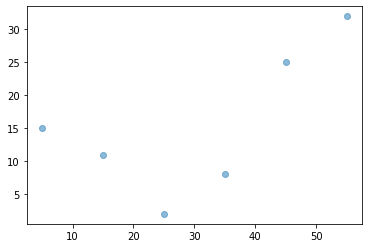

In [52]:
plt.scatter(x, y, alpha=0.5)

In [53]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [54]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [55]:
PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                  order='C')

PolynomialFeatures(include_bias=False)

In [56]:
x_ = transformer.transform(x)

In [57]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [58]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [59]:
model = LinearRegression().fit(x_, y)

In [61]:
r_sq = model.score(x_, y)
print('Coefficient of determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Coefficient of determination: 0.8908516262498564
Intercept: 21.372321428571425
Slope: [-1.32357143  0.02839286]


In [62]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [63]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [64]:
r_sq = model.score(x_, y)
print('Coefficient of determination:', r_sq)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Coefficient of determination: 0.8908516262498565
Intercept: 0.0
Slope: [21.37232143 -1.32357143  0.02839286]


In [65]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [72]:
# step 1
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# step 2a
x = [[0,1], [5,1], [15,2], [25,5], [35,11], [45,15], [55,34], [55,34], [60,35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x).reshape((-1, 1)), np.array(y)

# step 2b
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# step 3
model = LinearRegression().fit(x_, y)

# step 4
r_sq = model.score(x_,y)
intercept, coefficients = model.intercept_, model.coef_

# step 5
y_pred = model.predict(x_)

print('Coefficient of determination:', r_sq)
print('Intercept:', intercept)
print('Coefficients:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

ValueError: Found input variables with inconsistent numbers of samples: [18, 8]

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv", usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [74]:
df.shape

(205, 2)

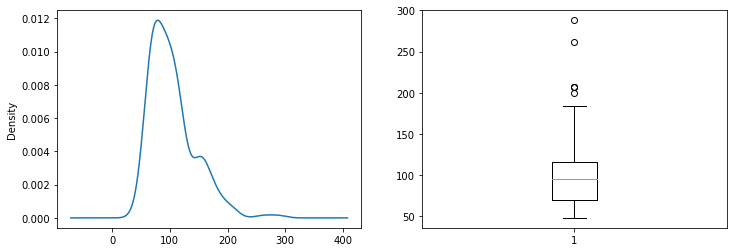

In [75]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

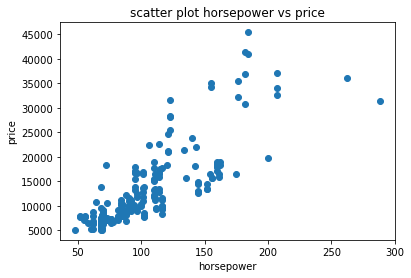

In [76]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('scatter plot horsepower vs price')
plt.show()

In [85]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [98]:
x = df['horsepower'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [88]:
x_train.shape

(164, 1)

In [89]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [93]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [94]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[163.92666324]]
[-3661.08367454]


In [95]:
lin_reg.score(x_test, y_test)

0.5311904670577531

In [ ]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)